<p style="background-color:#3ab1c8;font-family:Cursive;font-size:200%;color:black;text-align:center;border-radius:120px 20px;padding:20px;margin:20px;"><b>Hierarchical for Penguins - 23 Dec 23</b></p>

<p style="font-family:Cursive;font-size:100%;color:black;text-align:center;border-radius:10px 10px;"><b>by Nash</b></p>

<b style="font-family:Cursive;font-size:100%;color:black;text-align:right;border-radius:10px 10px;">Follow me [Linkedin](www.linkedin.com/in/nash-n-sungur-333869289) | [Git Hub](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0)</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg #pip install pygwalker

from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
%matplotlib inline
#%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Read Data

Palmer Archipelago (Antarktika) bölgesindeki penguenler hakkında bilgiler içerir.
**Temel özellikleri şunlardır:**
- **species**: Penguenin türünü gösterir. Örnek değerler: Adelie, Chinstrap, Gentoo.
- **island**: Penguenin gözlendiği ada. Örnek değerler: Biscoe, Dream, Torgersen.
- **bill_length_mm**: Penguenin gagasının uzunluğu (milimetre cinsinden).
- **bill_depth_mm**: Penguenin gagasının derinliği (milimetre cinsinden).
- **flipper_length_mm**: Penguenin yüzgeç uzunluğu (milimetre cinsinden).
- **body_mass_g**: Penguenin vücut ağırlığı (gram cinsinden).
- **sex**: Penguenin cinsiyeti.

In [41]:
df = pd.read_csv("penguins_eda.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
329,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
330,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
331,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
332,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [42]:
df_org = df.copy()

In [43]:
df.drop("species", axis=1, inplace=True)
df

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
329,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
330,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
331,Biscoe,50.4,15.7,222.0,5750.0,MALE
332,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [44]:
pd.get_dummies(df, drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
3,36.7,19.3,193.0,3450.0,0,1,0
4,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
329,47.2,13.7,214.0,4925.0,0,0,0
330,46.8,14.3,215.0,4850.0,0,0,0
331,50.4,15.7,222.0,5750.0,0,0,1
332,45.2,14.8,212.0,5200.0,0,0,0


# Train | Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = pd.get_dummies(df, drop_first=True)
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
3,36.7,19.3,193.0,3450.0,0,1,0
4,39.3,20.6,190.0,3650.0,0,1,1


In [47]:
X.shape

(334, 7)

# Scaling Data

scaling e gerek yok

# Hopkins test

In [48]:
from sklearn.neighbors import BallTree  # BallTree, veri noktaları arasındaki uzaklık sorgularını hızlı bir şekilde gerçekleştirmek için kullanılan bir veri yapısıdır. 

def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [49]:
hopkins(X, X.shape[0])

0.22827155883126543

# Dendogram

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [51]:
# linkage fonksiyonu cluster olusturmak icin, dendogram ise grafigi cizmek icin kullanilir

hc_ward = linkage (y= X, method ="ward") #varyansa göre - mevcut kümelenmede varyansı daha az değiştireceği yere atayacak biçimde yapar
hc_complete = linkage (X, "complete") #en uzak noktaya göre - yeni noktayı mecvut kümeler içindeki en uzak noktalara göre ölçüp daha yakın olana atama yapar
hc_average = linkage (X, "average") #ortalamaya göre - tüm kümelerin uzaklık ort. alıp yeni noktaya uzaklığı ölçer
hc_single= linkage(X ,"single") #en yakın noktaya göre-  yeni nokta, mevcut kümeler içindeki en yakın noktalara mesafe alıp daha küçük mesafe olan kümeye atar

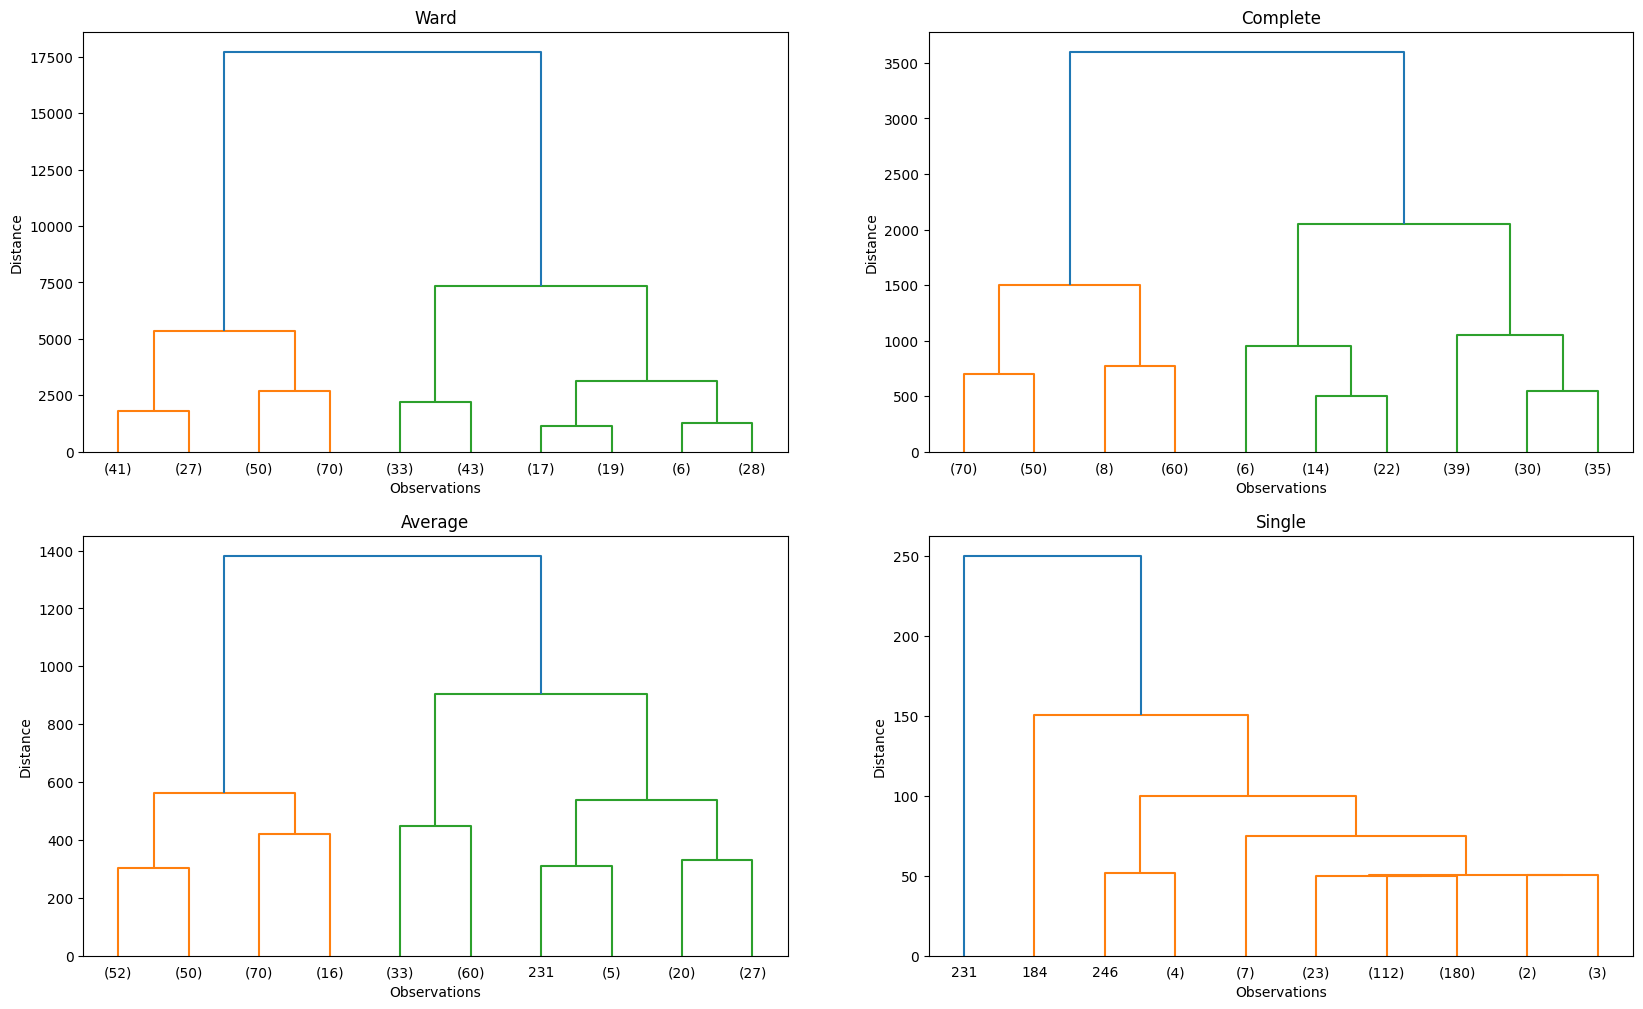

In [52]:
# Dendograms for all methods

plt.figure(figsize = (20,12))
plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10); # p en son dllarda oluşacak küme sayısı

# Hierarchical Clustering (Agglomerative) & Silhouette Score

In [53]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

In [54]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f"Silhouette Score for",{k}, "clusters",{silhouette_score(X, model.labels_)})

Silhouette Score for {2} clusters {0.6227472175088783}
Silhouette Score for {3} clusters {0.5582219163639747}
Silhouette Score for {4} clusters {0.5300233596168332}
Silhouette Score for {5} clusters {0.5114887539497603}
Silhouette Score for {6} clusters {0.49336810345593785}
Silhouette Score for {7} clusters {0.5212126188834071}
Silhouette Score for {8} clusters {0.5169517112723819}
Silhouette Score for {9} clusters {0.5097895611329845}


In [55]:
model =  AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "ward") #
model.fit_predict(X)

model.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,

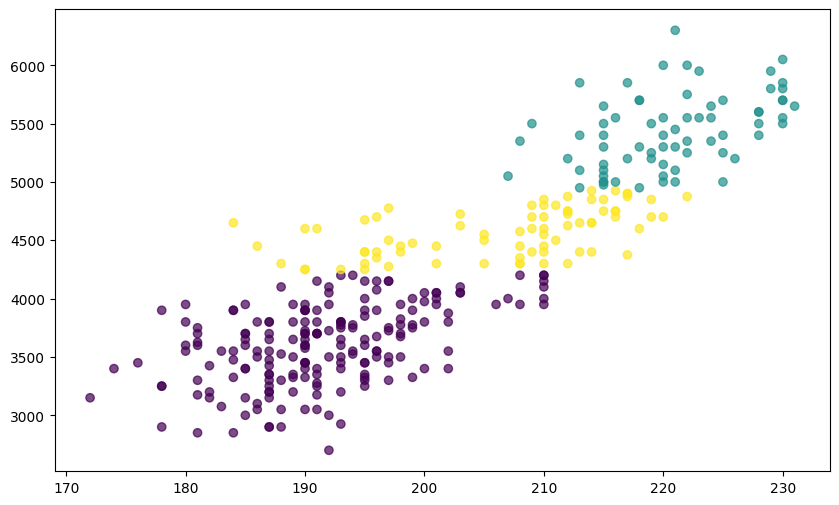

In [56]:
plt.scatter(X["flipper_length_mm"], X["body_mass_g"], c= model.labels_, cmap= "viridis", alpha = 0.7);

In [57]:
clusters = model.labels_  

df["predicted_clusters"] = clusters    
df

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,predicted_clusters
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,0
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
3,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
4,Torgersen,39.3,20.6,190.0,3650.0,MALE,0
...,...,...,...,...,...,...,...
329,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,2
330,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,2
331,Biscoe,50.4,15.7,222.0,5750.0,MALE,1
332,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1


In [88]:
X["predict_clusters"] = clusters
X["labels"]= df_org["species"]
X.sample(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE,predict_clusters,labels
210,43.5,18.1,202.0,3400.0,1,0,0,0,Chinstrap
248,48.4,16.3,220.0,5400.0,0,0,1,1,Gentoo
332,45.2,14.8,212.0,5200.0,0,0,0,1,Gentoo
0,39.1,18.7,181.0,3750.0,0,1,1,0,Adelie
180,49.7,18.6,195.0,3600.0,1,0,1,0,Chinstrap
245,45.1,14.5,207.0,5050.0,0,0,0,1,Gentoo
135,40.6,17.2,187.0,3475.0,1,0,1,0,Adelie
107,42.2,19.5,197.0,4275.0,0,0,1,2,Adelie
4,39.3,20.6,190.0,3650.0,0,1,1,0,Adelie
14,46.0,21.5,194.0,4200.0,0,1,1,0,Adelie


In [61]:
# cross table (crosstab), comperation

ct = pd.crosstab(X["predict_clusters"], X["labels"])
ct

labels,Adelie,Chinstrap,Gentoo
predict_clusters,,,
0,122,61,5
1,0,0,70
2,24,7,45


# ARI Score

In [62]:
from sklearn.metrics.cluster import adjusted_rand_score

In [63]:
adjusted_rand_score(X["predict_clusters"], X["labels"])

0.3563768862821351

In [89]:
X_labels = X.labels.map({"Adelie":0, "Gentoo":1,"Chinstrap":2})
X_labels

0      0
1      0
2      0
3      0
4      0
      ..
329    1
330    1
331    1
332    1
333    1
Name: labels, Length: 334, dtype: int64

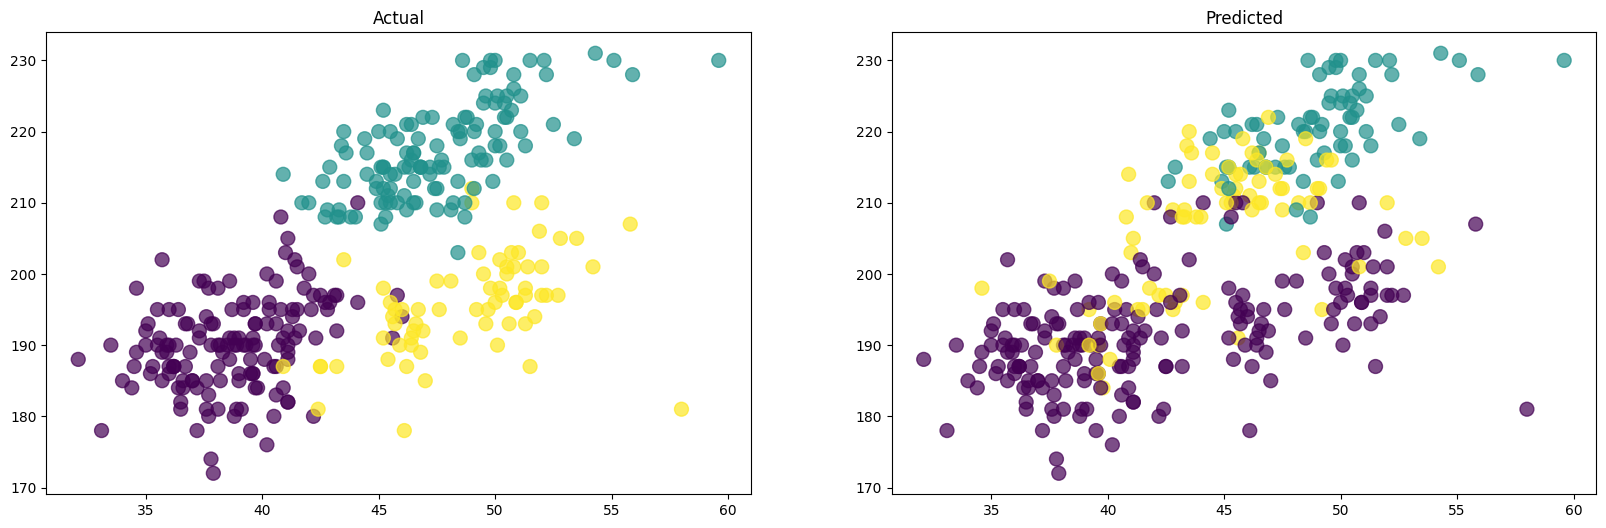

In [95]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["culmen_length_mm"], X["flipper_length_mm"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["culmen_length_mm"], X["flipper_length_mm"], c = X.predict_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

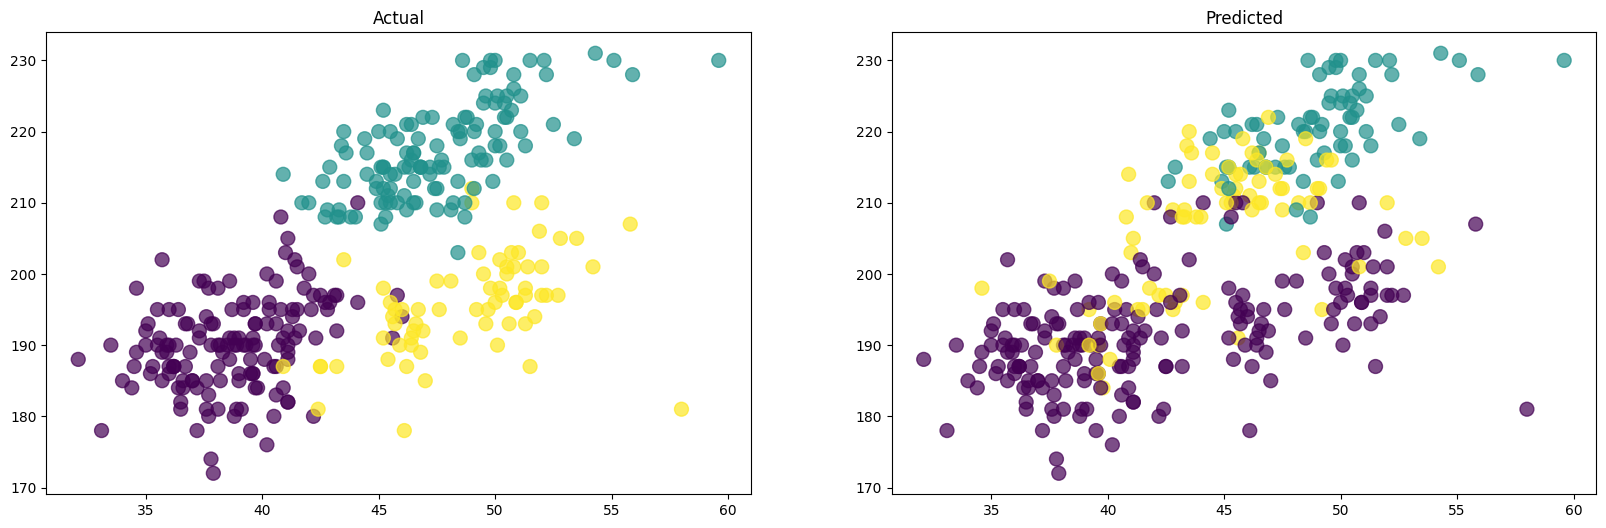

In [96]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["culmen_length_mm"], X["flipper_length_mm"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["culmen_length_mm"], X["flipper_length_mm"], c = X.predict_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted"); 

# Remodelling acoording to droppted features

In [97]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE,predict_clusters,labels
0,39.1,18.7,181.0,3750.0,0,1,1,0,Adelie
1,39.5,17.4,186.0,3800.0,0,1,0,0,Adelie
2,40.3,18.0,195.0,3250.0,0,1,0,0,Adelie
3,36.7,19.3,193.0,3450.0,0,1,0,0,Adelie
4,39.3,20.6,190.0,3650.0,0,1,1,0,Adelie


In [99]:
clus_pred = X.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8]].groupby("labels").mean().T
clus_pred

labels,Adelie,Chinstrap,Gentoo
culmen_length_mm,38.823973,48.833824,47.542500
culmen_depth_mm,18.347260,18.420588,15.002500
flipper_length_mm,190.102740,195.823529,217.233333
body_mass_g,3706.164384,3733.088235,5090.625000
island_Dream,0.376712,1.000000,0.000000
island_Torgersen,0.321918,0.000000,0.000000
sex_MALE,0.500000,0.500000,0.516667


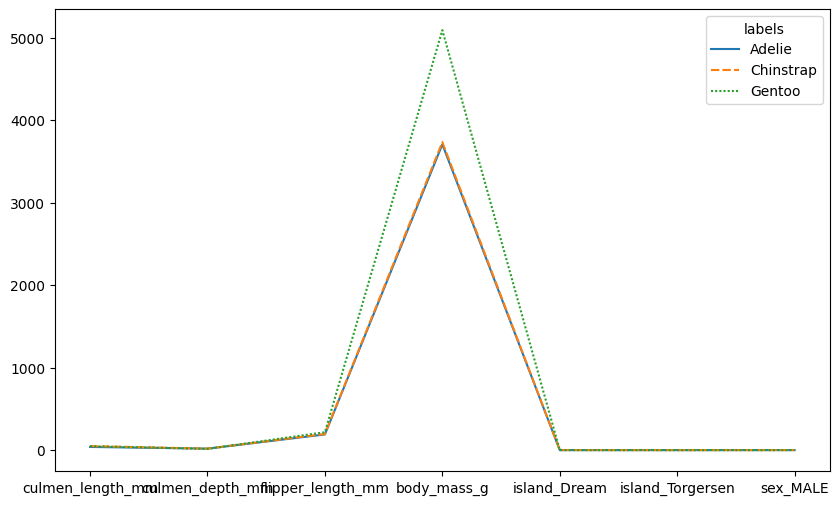

In [100]:
sns.lineplot(data = clus_pred);

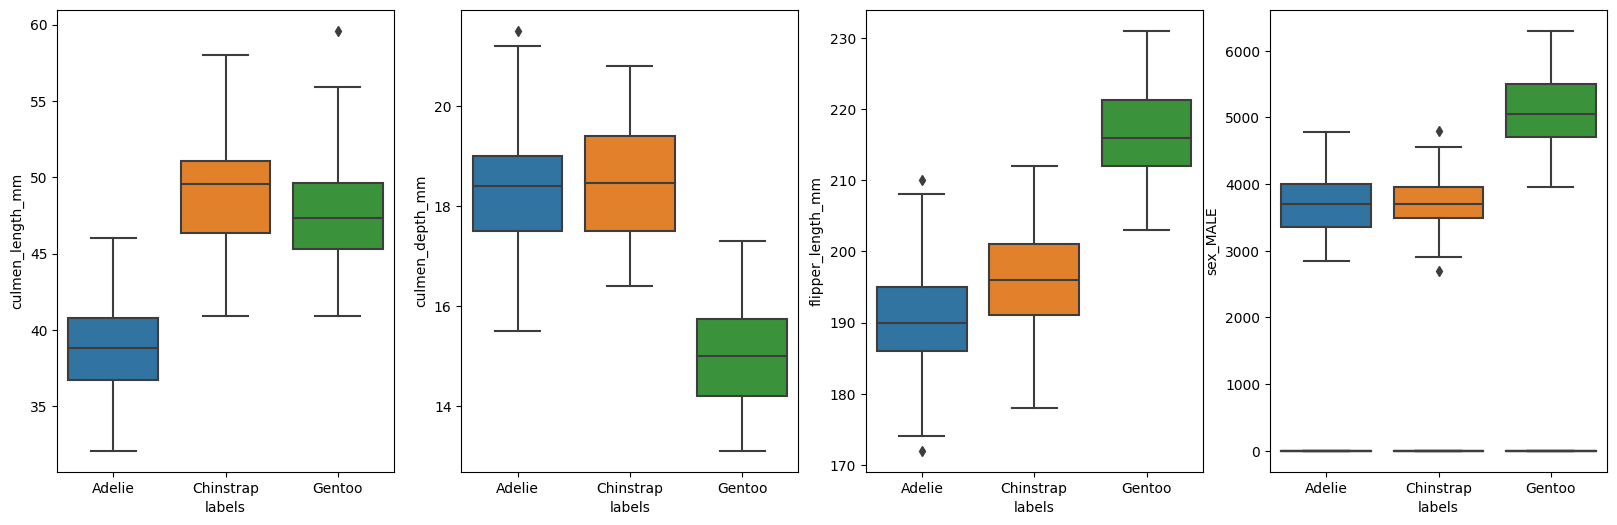

In [101]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "culmen_length_mm", x = "labels", data = X)

plt.subplot(142)
sns.boxplot(y = "culmen_depth_mm", x = "labels", data = X)

plt.subplot(143)
sns.boxplot(y = "flipper_length_mm", x = "labels", data = X)

plt.subplot(144)
sns.boxplot(y = "body_mass_g", x = "labels", data = X);

plt.subplot(144)
sns.boxplot(y = "island_Dream", x = "labels", data = X);

plt.subplot(144)
sns.boxplot(y = "island_Torgersen", x = "labels", data = X);

plt.subplot(144)
sns.boxplot(y = "sex_MALE", x = "labels", data = X);

# New model with 2 features and Dendograms

In [131]:
X2 = X.iloc[:, [0,1,2,3]]
X2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
329,47.2,13.7,214.0,4925.0
330,46.8,14.3,215.0,4850.0
331,50.4,15.7,222.0,5750.0
332,45.2,14.8,212.0,5200.0


In [132]:
hc_ward2 = linkage(y = X2, method = "ward") # X2  seti için 'ward' yöntemiyle birleştirici hiyerarşik kümeleme gerçekleştirir.
hc_complete2 = linkage(X2, "complete")  # complete' veya 'maksimum' yöntemini kullanır
hc_average2 = linkage(X2, "average")  # tüm çiftler arasındaki ortalama uzaklığı kullanarak kümeleri birleştirir
hc_single2 = linkage(X2, "single")  # Single' veya 'minimum' yöntemi, kümeler arasındaki en yakın noktaları dikkate alı

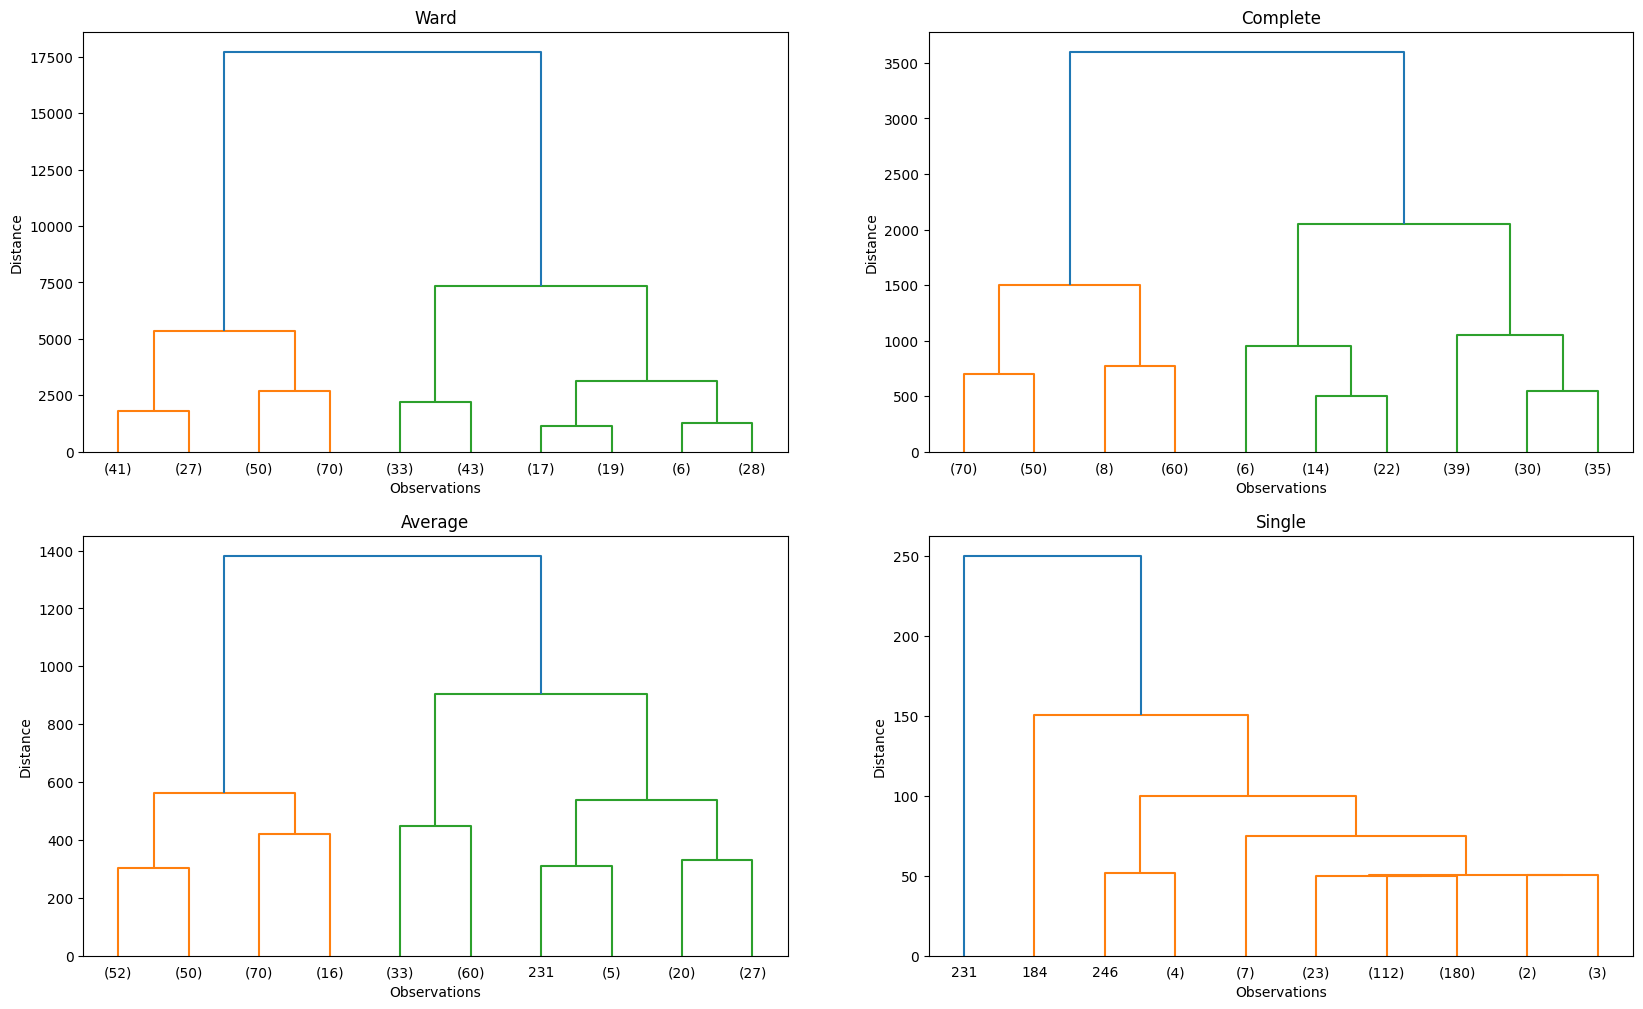

In [133]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single2, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [134]:
K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.622750227893427
Silhouette Score for 3 clusters: 0.5582268984209309
Silhouette Score for 4 clusters: 0.5300344756156059
Silhouette Score for 5 clusters: 0.5115006134065871
Silhouette Score for 6 clusters: 0.4933924350369186
Silhouette Score for 7 clusters: 0.5212420737071015
Silhouette Score for 8 clusters: 0.5169884577163124
Silhouette Score for 9 clusters: 0.5098263573547477


# Final Model

In [135]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "complete")
clusters = final_model.fit_predict(X2)

In [136]:
labels=pd.DataFrame(df_org["species"])

X2["predicted_clusters"] = clusters
X2["labels"] = labels
X2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,predicted_clusters,labels
0,39.1,18.7,181.0,3750.0,0,Adelie
1,39.5,17.4,186.0,3800.0,0,Adelie
2,40.3,18.0,195.0,3250.0,0,Adelie
3,36.7,19.3,193.0,3450.0,0,Adelie
4,39.3,20.6,190.0,3650.0,0,Adelie
...,...,...,...,...,...,...
329,47.2,13.7,214.0,4925.0,1,Gentoo
330,46.8,14.3,215.0,4850.0,1,Gentoo
331,50.4,15.7,222.0,5750.0,2,Gentoo
332,45.2,14.8,212.0,5200.0,1,Gentoo


In [137]:
X2_ct = pd.crosstab(X2["predicted_clusters"], X2["labels"])
X2_ct

labels,Adelie,Chinstrap,Gentoo
predicted_clusters,,,
0,122,61,5
1,24,7,73
2,0,0,42


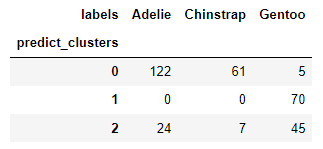

# ARI score

In [138]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)

0.3334361262591671